In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2 
import os
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [2]:
DATADIR  = "F:/RPSdataset/RPS/AllinOne"
CATEGORIES = ["Paper","Rock","Scissors"]
IMG_SIZE=50

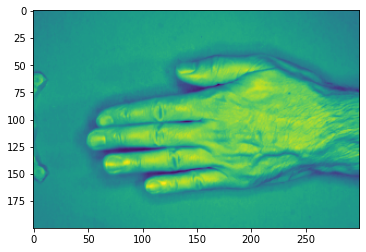

In [3]:
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array)
        plt.show()
        break
    break

In [4]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()            

In [5]:
print(len(training_data))

5080


In [6]:
lenofimage = len(training_data)

In [7]:
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)
##X = tf.keras.utils.normalize(X, axis = 1)

In [8]:
X.shape


(5080, 2500)

In [9]:
X = X/255.0
y=np.array(y)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [11]:
# import xgboost as xgb
# gbm = xgb.XGBClassifier(max_depth=3, n_estimators=10, learning_rate=0.05, use_label_encoder=False)
# gbm = gbm.fit(X_train, y_train)

In [12]:
# print("Accuracy on training set: {:.3f}".format(gbm.score(X_train, y_train))) 
# print("Accuracy on test set: {:.3f}".format(gbm.score(X_test, y_test)))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [13]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

In [14]:
y_pred = svc.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score
print("Model accuracy is",accuracy_score(y_test,y_pred))

Model accuracy is 0.8248031496062992


In [16]:
from sklearn.metrics import classification_report
print("Accuracy on unknown data is",classification_report(y_test,y_pred))

Accuracy on unknown data is               precision    recall  f1-score   support

           0       0.85      0.82      0.83       362
           1       0.81      0.83      0.82       313
           2       0.82      0.83      0.82       341

    accuracy                           0.82      1016
   macro avg       0.82      0.82      0.82      1016
weighted avg       0.83      0.82      0.82      1016



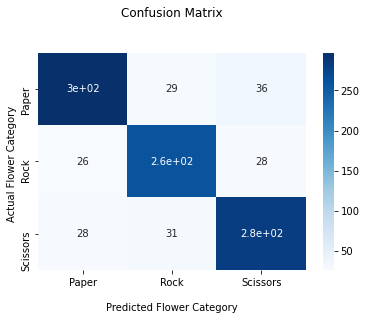

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

y_pred = svc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Flower Category')
ax.set_ylabel('Actual Flower Category ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Paper','Rock', 'Scissors'])
ax.yaxis.set_ticklabels(['Paper','Rock', 'Scissors'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [18]:
result = pd.DataFrame({'original' : y_test,'predicted' : y_pred})

In [19]:
result

,original,predicted
0,1,2
1,0,0
2,0,1
3,0,0
4,0,0
...,...,...
1011,0,0
1012,1,2
1013,0,0
1014,0,0


In [203]:
# model = XGBClassifier(max_depth = 4)

# # Create eval set with both training and test set
# eval_set = [(X_train, y_train), (X_test, y_test)]

# # Fit model 
# model.fit(X_train, y_train, eval_metric=["auc", "logloss"], eval_set=eval_set, verbose=False)

# # Make predictions for test data
# y_pred = model.predict(X_test)

# # Evaluate predictions
# auc = roc_auc_score(y_test, y_pred)
# print("AUC: %.2f%%" % (auc * 100.0))

# # Retrieve performance metrics
# results = model.evals_result()
# epochs = len(results['validation_0']['auc'])
# x_axis = range(0, epochs)

# # Plot log loss
# fig, ax = plt.subplots()
# ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
# ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
# ax.legend()
# plt.ylabel('Log Loss')
# plt.title('XGBoost Log Loss')
# plt.show()

In [20]:
print(type(y_pred))
print(type(y_test))




<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [22]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import roc_curve, auc
# y_pred = svc.predict (X_test)
# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# class_names = ["Paper","Rock","Scissors"]

# for i in range(3):
#     fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

# for i in range(3):
#     plt.figure()
#     plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
#     plt.plot([0, 1], [0, 1], 'k--')
    
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title(f'Receiver operating characteristic for Class {class_names[i]}')
#     plt.legend(loc="lower right")
#     plt.show()